## Importar as dependências

In [74]:
import sys
import json

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator

import seaborn as sns
import numpy as np

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_class_weight

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from joblib import dump, load

## Importar a base

In [9]:
# Importando o arquivo
df = pd.read_csv("card_transdata.csv")

# Exibir as primeiras linhas da base
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Análise dos dados

In [13]:
# verifica os valores nulos
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [14]:
# Conferindo o tipo das variaveis
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [5]:
# resumo estatístico
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Tratamento dos dados

In [10]:
# passar as variaveis repeat_retailer, used_chip, used_pin_number, online_order, fraud para int
cols_to_convert = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]

# Convertendo para inteiro
df[cols_to_convert] = df[cols_to_convert].astype(int)

# Conferindo o resultado
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [7]:
# Exibir as primeiras linhas da base
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


## Análise e distribuição das variáveis

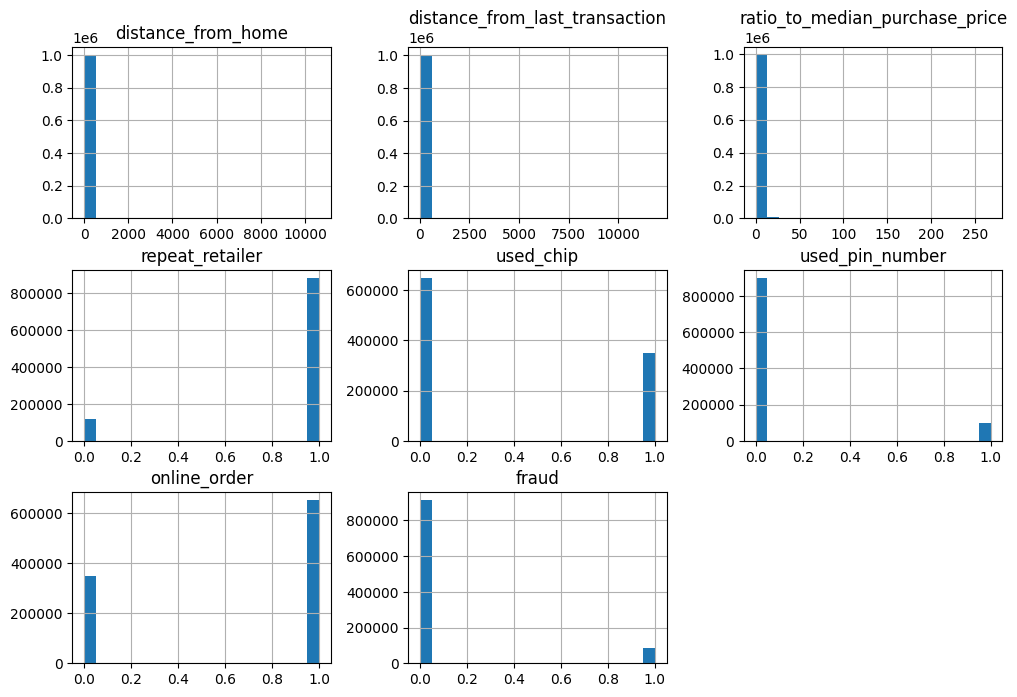

In [8]:
df.hist(figsize=(12, 8), bins=20)
plt.show()


## Correlação Entre as Variáveis

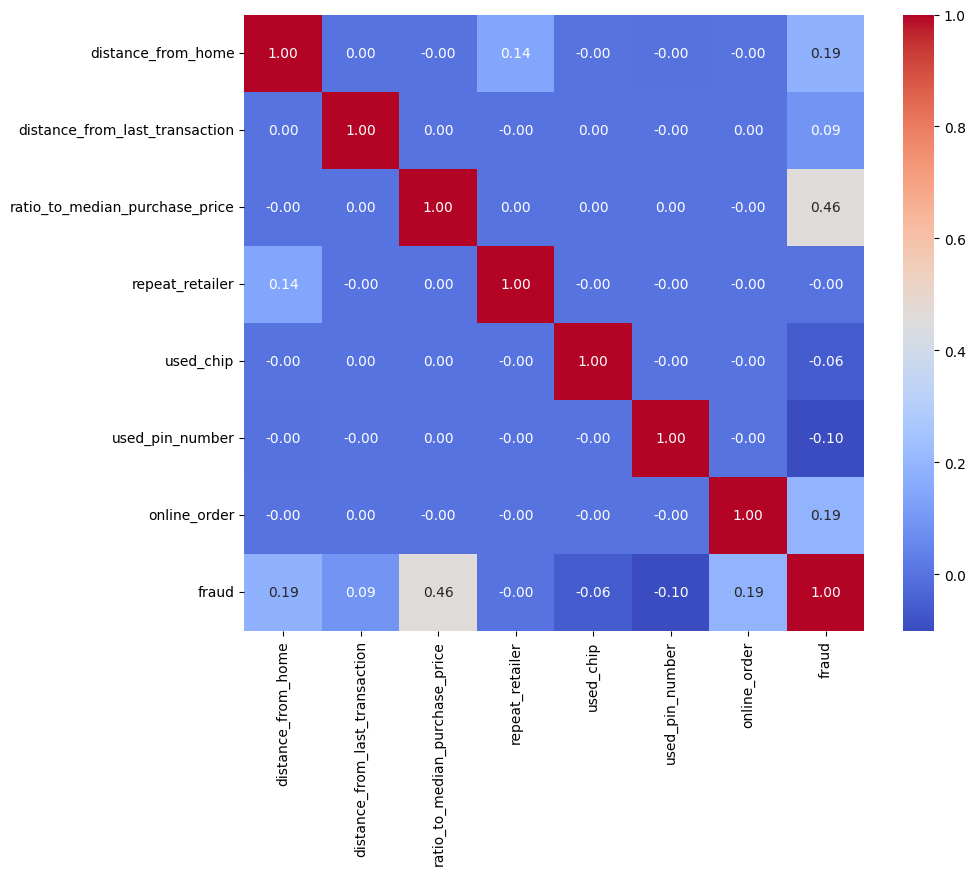

In [9]:

# Criando a matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [10]:
# Ordenando as correlações com a variável alvo (fraud)
correlation_with_target = correlation_matrix["fraud"].sort_values(ascending=False)
print(correlation_with_target)

fraud                             1.000000
ratio_to_median_purchase_price    0.462305
online_order                      0.191973
distance_from_home                0.187571
distance_from_last_transaction    0.091917
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64


## Comparando as Variáveis com o Alvo

In [ ]:
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
0,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225
1,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318


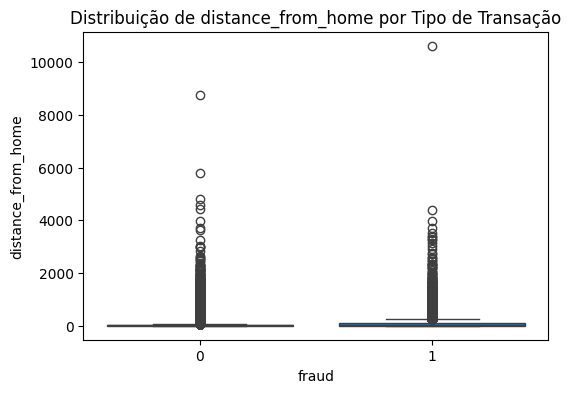

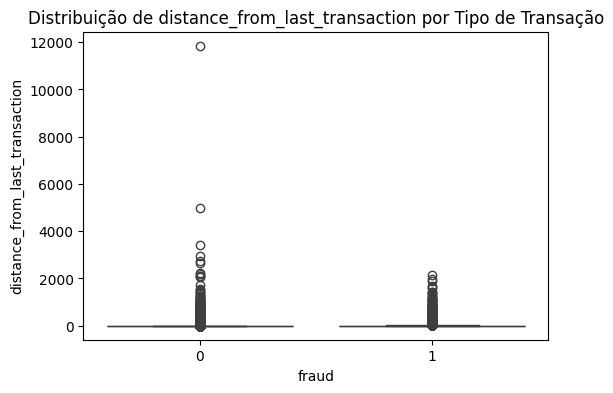

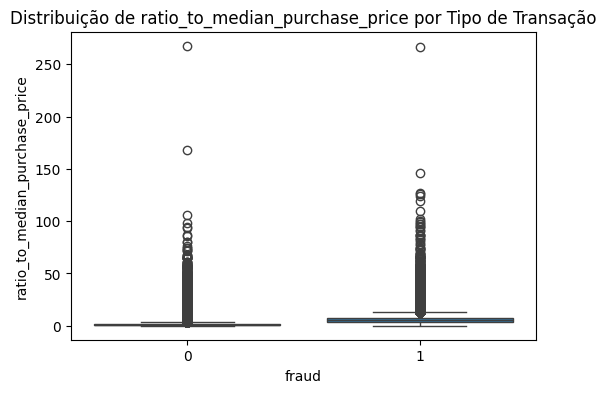

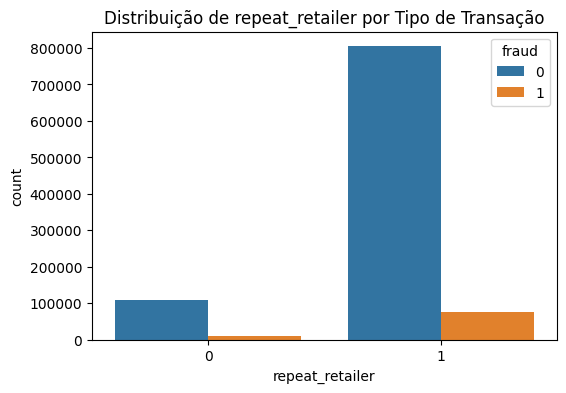

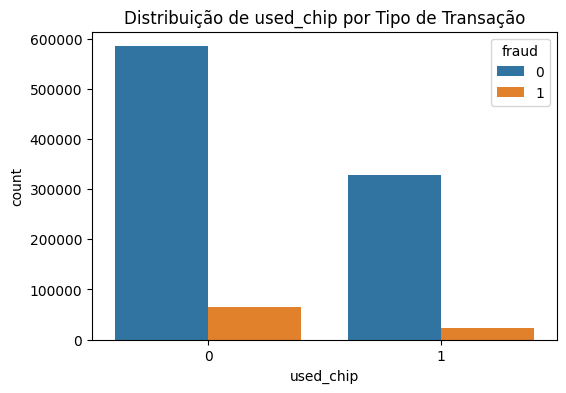

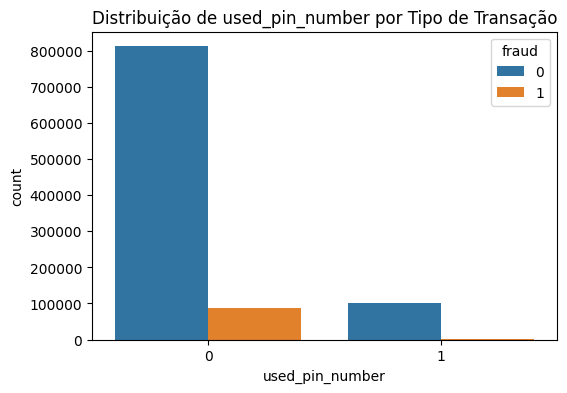

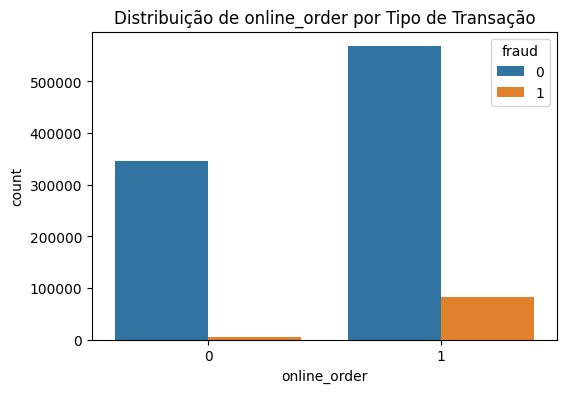

In [12]:
for col in df.columns[:-1]:  # Ignorando a coluna 'fraud'
    plt.figure(figsize=(6, 4))
    if col in ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
        sns.boxplot(x=df["fraud"], y=df[col])
    else:
        sns.countplot(data = df, x = col, hue = 'fraud')
    plt.title(f"Distribuição de {col} por Tipo de Transação")   
    plt.show()


## Carregar os dados

In [11]:
# Carregar os dados

# X = df[['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'distance_from_last_transaction', 'used_chip', 'used_pin_number']]
X = df[['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'distance_from_last_transaction']]
y = df['fraud']

In [12]:
# Separa 10% dos dados para homologação
X_modelagem, X_homologacao, y_modelagem, y_homologacao = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## Função de apoio

In [13]:
# Listas para salvar os resultados de acurácia e precisão
acuracia_arvore = []
acuracia_knn = []
acuracia_bayes = []
acuracia_rf = []

precisao_arvore = []
precisao_knn = []
precisao_bayes = []
precisao_rf = []

recall_arvore = []
recall_knn = []
recall_bayes = []
recall_rf = []

In [16]:
# Definir um peso para balanceamento de classes
weight = compute_class_weight('balanced', classes=np.unique(y_modelagem), y=y_modelagem)

class_weights = dict(zip(np.unique(y_modelagem), weight))

# definir os modelos
arvore = DecisionTreeClassifier(class_weight=class_weights, max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
bayes = GaussianNB()
rf = RandomForestClassifier(class_weight=class_weights, n_estimators=50)

In [17]:
# Função para trinar e avaliar os modelos

np.random.seed(19)

def sendToGym():
    # Dividir os dados em treino (80%) e teste (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_modelagem, y_modelagem, test_size=0.2)

    # Treinar os modelos
    arvore.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    bayes.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    # Fazer previsões no conjunto de teste
    pred_arvore = arvore.predict(X_test)
    pred_knn = knn.predict(X_test)
    pred_bayes = bayes.predict(X_test)
    pred_rf = rf.predict(X_test)

    # Registrar as avaliações dos modelos

    # Precisão
    precisao_arvore.append(accuracy_score(y_test, pred_arvore))
    precisao_knn.append(accuracy_score(y_test, pred_knn))
    precisao_bayes.append(accuracy_score(y_test, pred_bayes))
    precisao_rf.append(accuracy_score(y_test, pred_rf))

    # Acurácia
    acuracia_arvore.append(precision_score(y_test, pred_arvore, average='weighted'))
    acuracia_knn.append(precision_score(y_test, pred_knn, average='weighted'))
    acuracia_bayes.append(precision_score(y_test, pred_bayes, average='weighted'))
    acuracia_rf.append(precision_score(y_test, pred_rf, average='weighted'))

    # Recall
    recall_arvore.append(recall_score(y_test, pred_arvore, average='weighted'))
    recall_knn.append(recall_score(y_test, pred_knn, average='weighted'))
    recall_bayes.append(recall_score(y_test, pred_bayes, average='weighted'))
    recall_rf.append(recall_score(y_test, pred_rf, average='weighted'))

## Modelo com arvore

In [ ]:
# 1️⃣ Carregar os dados
# Os dados já foram carregados

In [35]:
# 2️⃣ Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# 3️⃣ Criar e treinar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [37]:
# 4️⃣ Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [38]:
# 5️⃣ Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.979365

Matriz de Confusão:
 [[180076   2481]
 [  1646  15797]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    182557
           1       0.86      0.91      0.88     17443

    accuracy                           0.98    200000
   macro avg       0.93      0.95      0.94    200000
weighted avg       0.98      0.98      0.98    200000



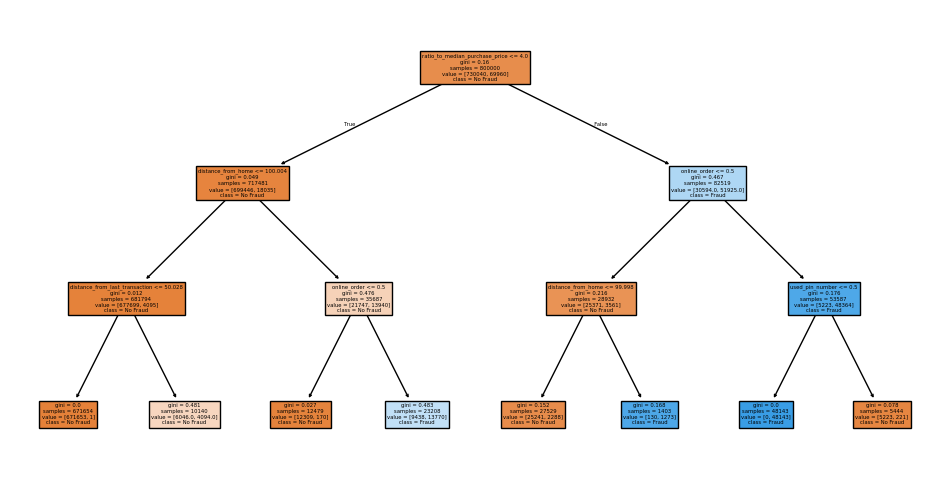

In [39]:
# 6️⃣ Visualizar a árvore de decisão
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['No Fraud', 'Fraud'], filled=True)
plt.show()

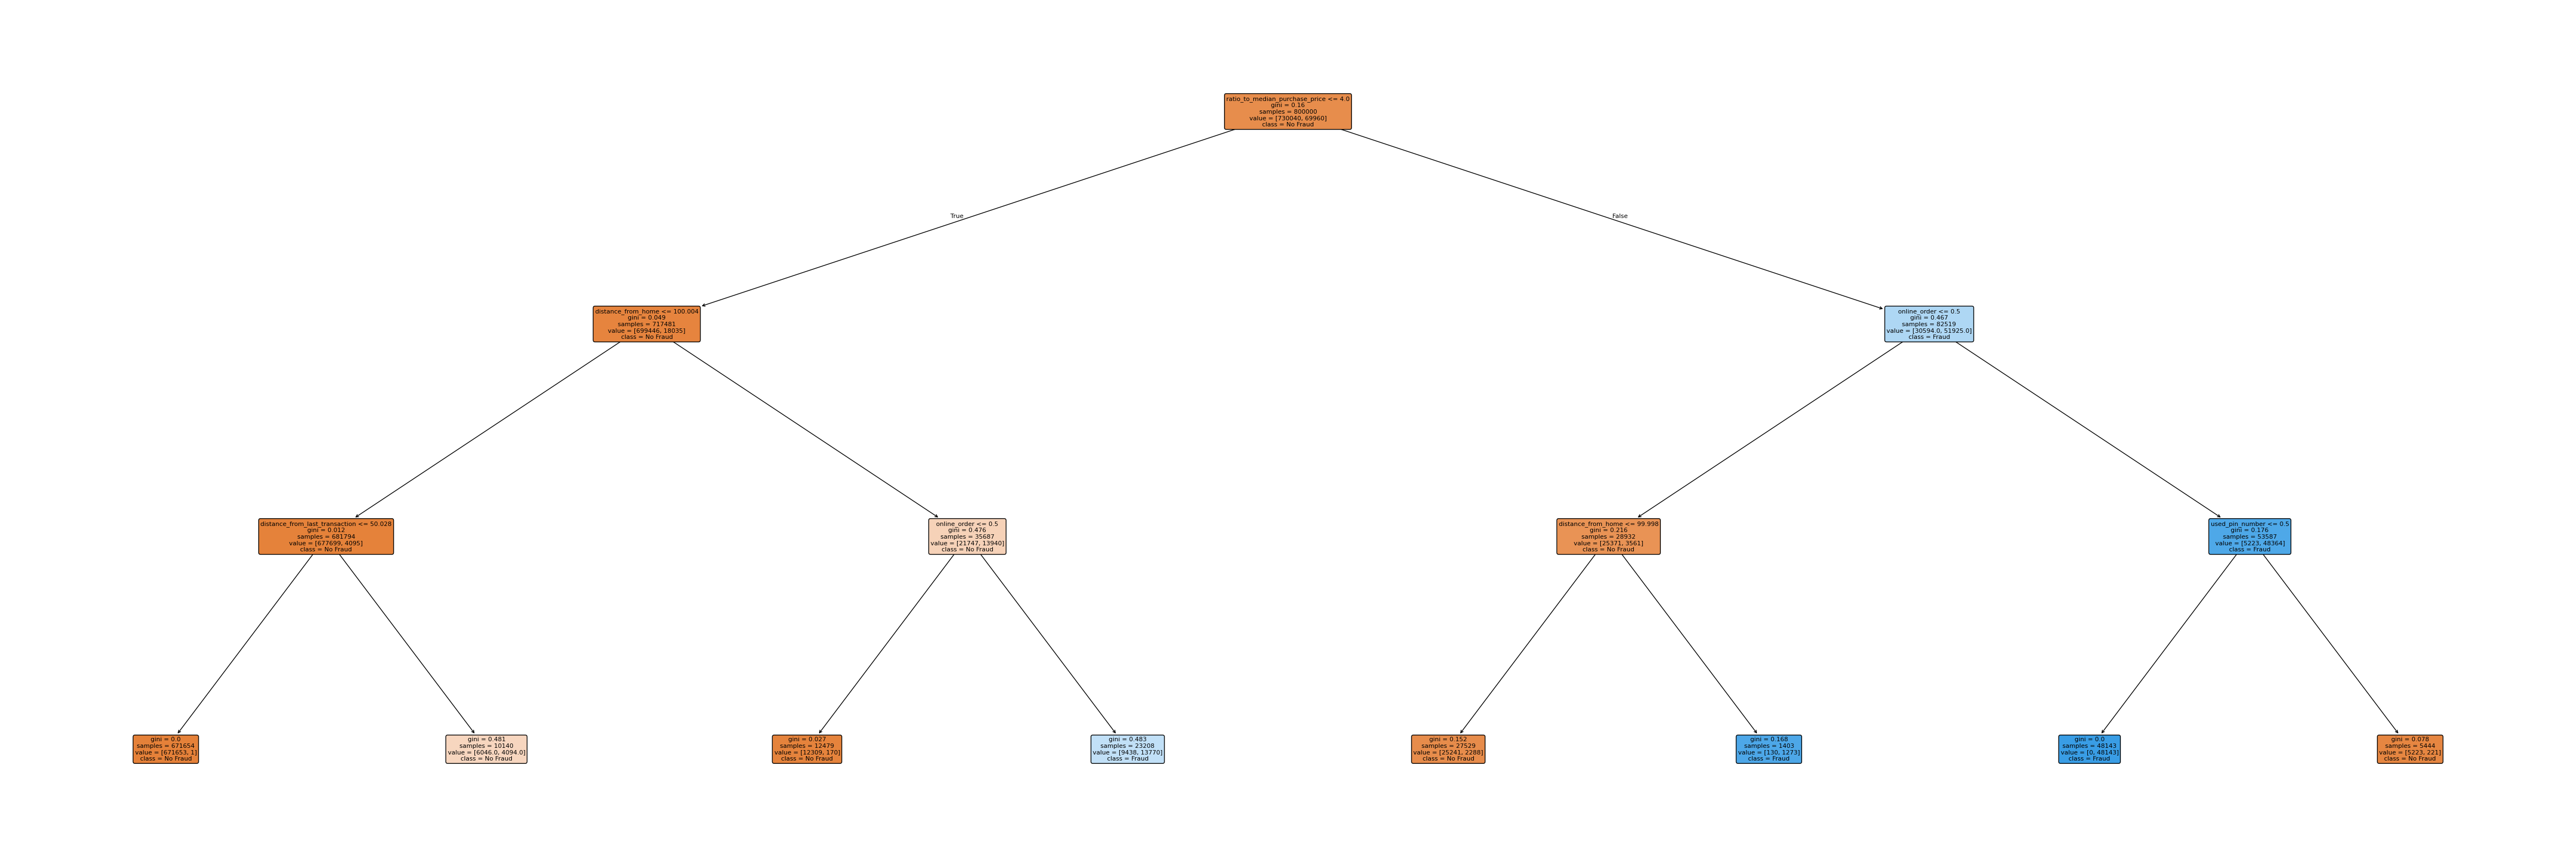

In [ ]:
plt.figure(figsize=(60, 20))

# Plotar a árvore
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['No Fraud', 'Fraud'], 
          filled=True, rounded=True, fontsize=8)

# Salvar a imagem
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')

# Exibir no Jupyter
plt.show()

## Treino pesado dos modelos

In [59]:
n_int = 10

sys.stdout.write(f'\r[{'-' * 50}] 0%')
sys.stdout.flush()

for i in range(0, n_int):
    sendToGym()
    
    # barra de progresso
    percent = (i + 1) / n_int
    bar = '#' * int(50 * percent) + '-' * (50 - int(50 * percent))

    sys.stdout.write(f'\r[{bar}] {int(percent * 100)}%')
    sys.stdout.flush()

[##################################################] 100%

In [60]:
# Exibir as métricas dos modelos
print(f"""
Média das métricas dos modelos:

Precisão;
árvore: {np.mean(precisao_arvore):.4f}
knn: {np.mean(precisao_knn):.4f}
bayes: {np.mean(precisao_bayes):.4f}
rf: {np.mean(precisao_rf):.4f}

Acurácia:
árvore: {np.mean(acuracia_arvore):.4f}
bayes: {np.mean(acuracia_bayes):.4f}
knn: {np.mean(acuracia_knn):.4f}
rf: {np.mean(acuracia_rf):.4f}

Recall:
árvore: {np.mean(recall_arvore):.4f}
bayes: {np.mean(recall_bayes):.4f}
knn: {np.mean(recall_knn):.4f}
rf: {np.mean(recall_rf):.4f}
    """)


Média das métricas dos modelos:

Precisão;
árvore: 0.9699
knn: 0.9653
bayes: 0.9308
rf: 0.9736

Acurácia:
árvore: 0.9762
bayes: 0.9211
knn: 0.9663
rf: 0.9752

Recall:
árvore: 0.9699
bayes: 0.9308
knn: 0.9653
rf: 0.9736
    


In [61]:
df_temp = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'KNN', 'Naive Bayes', 'Random Forest'],
    'Precisão': [np.mean(precisao_arvore), np.mean(precisao_knn), np.mean(precisao_bayes), np.mean(precisao_rf)],
    'Recall': [np.mean(recall_arvore), np.mean(recall_knn), np.mean(recall_bayes), np.mean(recall_rf)],
    'Acurácia': [np.mean(acuracia_arvore), np.mean(acuracia_knn), np.mean(acuracia_bayes), np.mean(acuracia_rf)]
})

df_temp

,Modelo,Precisão,Recall,Acurácia
0,Árvore de Decisão,0.969939,0.969939,0.976164
1,KNN,0.965272,0.965272,0.966254
2,Naive Bayes,0.930818,0.930818,0.921132
3,Random Forest,0.973650,0.973650,0.975186


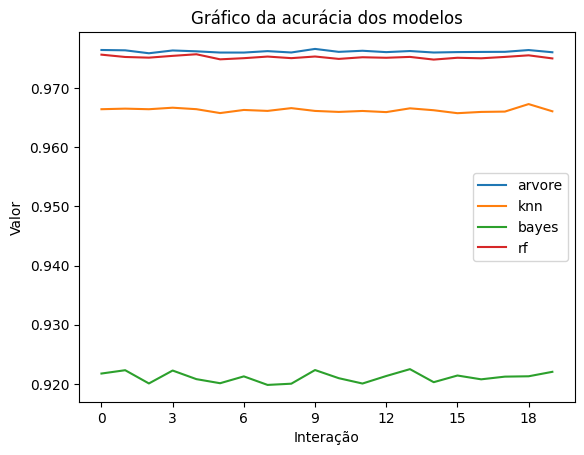

In [69]:
# Exibe os valores da acurácia em gráfico

plt.title('Gráfico da acurácia dos modelos')

plt.plot(acuracia_arvore, label='arvore')
plt.plot(acuracia_knn, label='knn')
plt.plot(acuracia_bayes, label='bayes')
plt.plot(acuracia_rf, label='rf')

# Adicionando título e rótulos aos eixos
plt.xlabel('Interação')
plt.ylabel('Valor')

# Adicionando a legenda para identificar as linhas
plt.legend()

# Aqui força o eixo X a mostrar apenas inteiros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Ajusta os números para 3 casas decimais
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

# Exibindo o gráfico
plt.show()

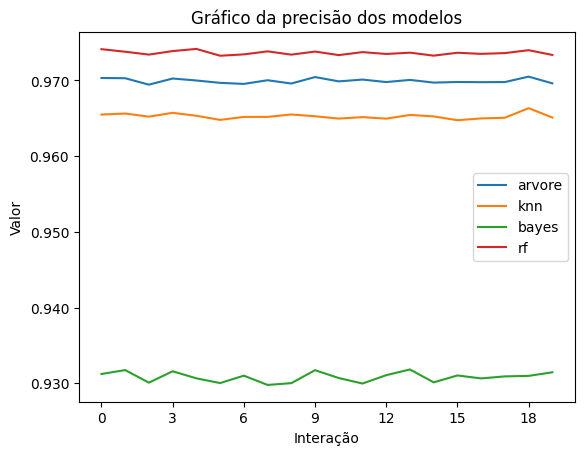

In [70]:
# Exibe os valores da precisão em gráfico

plt.title('Gráfico da precisão dos modelos')

plt.plot(precisao_arvore, label='arvore')
plt.plot(precisao_knn, label='knn')
plt.plot(precisao_bayes, label='bayes')
plt.plot(precisao_rf, label='rf')

# Adicionando título e rótulos aos eixos
plt.xlabel('Interação')
plt.ylabel('Valor')

# Adicionando a legenda para identificar as linhas
plt.legend()

# Aqui força o eixo X a mostrar apenas inteiros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Ajusta os números para 3 casas decimais
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

# Exibindo o gráfico
plt.show()

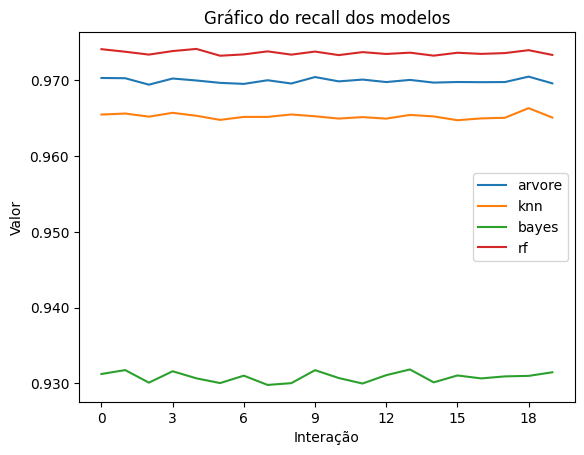

In [71]:
# Exibe os valores do recall em gráfico

plt.title('Gráfico do recall dos modelos')

plt.plot(recall_arvore, label='arvore')
plt.plot(recall_knn, label='knn')
plt.plot(recall_bayes, label='bayes')
plt.plot(recall_rf, label='rf')

# Adicionando título e rótulos aos eixos
plt.xlabel('Interação')
plt.ylabel('Valor')

# Adicionando a legenda para identificar as linhas
plt.legend()

# Aqui força o eixo X a mostrar apenas inteiros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Ajusta os números para 3 casas decimais
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))

# Exibindo o gráfico
plt.show()

## Homologação

In [72]:
# Homologação do modelo arvore de decisão
y_pred_homologacao_arvore = arvore.predict(X_homologacao)

print("Relatório de classificação na base de homologação:")
print(classification_report(y_homologacao, y_pred_homologacao_arvore))

print("Matriz de confusão:")
print(confusion_matrix(y_homologacao, y_pred_homologacao_arvore))

Relatório de classificação na base de homologação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     91260
           1       0.76      0.98      0.85      8740

    accuracy                           0.97    100000
   macro avg       0.88      0.97      0.92    100000
weighted avg       0.98      0.97      0.97    100000

Matriz de confusão:
[[88570  2690]
 [  215  8525]]


In [28]:
# Homologação do modelo KNN
y_pred_homologacao_knn = knn.predict(X_homologacao)

print("Relatório de classificação na base de homologação:")
print(classification_report(y_homologacao, y_pred_homologacao_knn))

print("Matriz de confusão:")
print(confusion_matrix(y_homologacao, y_pred_homologacao_knn))

Relatório de classificação na base de homologação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     91260
           1       0.80      0.84      0.82      8740

    accuracy                           0.97    100000
   macro avg       0.89      0.91      0.90    100000
weighted avg       0.97      0.97      0.97    100000

Matriz de confusão:
[[89391  1869]
 [ 1441  7299]]


In [42]:
# Homologação do modelo naive bayes
y_pred_homologacao_bayes = bayes.predict(X_homologacao)

print("Relatório de classificação na base de homologação:")
print(classification_report(y_homologacao, y_pred_homologacao_bayes))

print("Matriz de confusão:")
print(confusion_matrix(y_homologacao, y_pred_homologacao_bayes))

Relatório de classificação na base de homologação:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     91260
           1       0.70      0.40      0.51      8740

    accuracy                           0.93    100000
   macro avg       0.82      0.69      0.73    100000
weighted avg       0.92      0.93      0.92    100000

Matriz de confusão:
[[89741  1519]
 [ 5268  3472]]


In [73]:
# Homologação do modelo random forest
y_pred_homologacao_rf = rf.predict(X_homologacao)

print("Relatório de classificação na base de homologação:")
print(classification_report(y_homologacao, y_pred_homologacao_rf))

print("Matriz de confusão:")
print(confusion_matrix(y_homologacao, y_pred_homologacao_rf))

Relatório de classificação na base de homologação:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     91260
           1       0.82      0.90      0.86      8740

    accuracy                           0.97    100000
   macro avg       0.91      0.94      0.92    100000
weighted avg       0.98      0.97      0.98    100000

Matriz de confusão:
[[89582  1678]
 [  858  7882]]


In [75]:
# Salva os dados de métricas dos treinos em um dicionário para exportar

dadosDeTreino = {
    'arvore': {
        'acuracia': acuracia_arvore,
        'precisao': precisao_arvore,
        'recall': recall_arvore
    },
    'knn': {
        'acuracia': acuracia_knn,
        'precisao': precisao_knn,
        'recall': recall_knn
    },
    'bayes': {
        'acuracia': acuracia_bayes,
        'precisao': precisao_bayes,
        'recall': recall_bayes
    },
    'rf': {
        'acuracia': acuracia_rf,
        'precisao': precisao_rf,
        'recall': recall_rf
    }
}

# Salva os dados em um arquivo JSON
with open("dadosDeTreino.json", "w", encoding='utf-8') as arquivo:
    json.dump(dadosDeTreino, arquivo, ensure_ascii=False, indent=4)


In [76]:
# Salvar o modelo
dump(rf, 'modelo_random_forest.joblib')

['modelo_random_forest.joblib']